In [41]:
# this model will be able to determine whether a photo is of the morning sky, evening sky, or night sky

import fastbook
fastbook.setup_book()

In [42]:
from fastbook import *
from fastai.vision.all import *
from fastai.vision.widgets import * 

In [43]:
# get images for model
results = search_images_ddg('lion')
ims = results.attrgot('contentUrl')
len(ims)

200

In [44]:
ims = ['https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fwww.zoochat.com%2Fcommunity%2Fmedia%2Fafrican-lion.474539%2Ffull%3Fd%3D1578593175&f=1&nofb=1']

In [45]:
dest = 'big_cat_pictures/lion.jpg'
download_url(ims[0], dest)

Path('big_cat_pictures/lion.jpg')

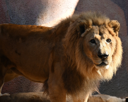

In [46]:
im = Image.open(dest)
im.to_thumb(128, 128)

In [47]:
big_cat_types = 'lion', 'tiger', 'panther', 'leopard', 'lynx', 'cheetah'
path = Path('big_cats')

In [48]:
if not path.exists():
    path.mkdir()
    for o in big_cat_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_ddg(f'{o}')
        download_images(dest, urls=results)

In [49]:
fns = get_image_files(path)
fns

(#1026) [Path('big_cats/cheetah/009495a3-f420-48aa-bd34-c2dd92e7e5b5.jpg'),Path('big_cats/cheetah/01f38762-23a0-46a1-ab7b-029ac17eae67.jpg'),Path('big_cats/cheetah/03b0af6e-aefc-458b-b905-e609a30e08e8.jpg'),Path('big_cats/cheetah/04a2fc00-ebb7-4f61-9ad0-2bdf70bdbd8f.jpg'),Path('big_cats/cheetah/0523b49f-0c99-466a-9ccd-a23c3a95ba71.jpg'),Path('big_cats/cheetah/05bf9a99-d858-408b-87de-842671918cb8.jpg'),Path('big_cats/cheetah/0953ec8e-2b94-4c29-98ea-af21e273b2d1.jpg'),Path('big_cats/cheetah/0b37bb2d-bc61-4817-b7c5-c37d57086669.jpg'),Path('big_cats/cheetah/0bf0d216-0f31-478f-8e25-d65de6528d3c.jpg'),Path('big_cats/cheetah/0ccb26bc-fbbb-4dfc-806a-46f8bb3d09ee.jpg')...]

In [50]:
failed = verify_images(fns)
failed

(#0) []

In [51]:
failed.map(Path.unlink)

(#0) []

In [52]:
??search_images_ddg

In [53]:
big_cats = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [54]:
dls = big_cats.dataloaders(path)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


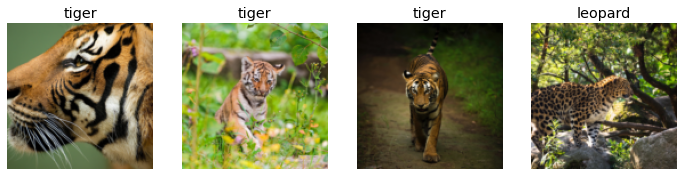

In [55]:
dls.valid.show_batch(max_n=4, nrows=1)

In [56]:
# big_cats = big_cats.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
# dls = big_cats.dataloaders(path)
# dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [57]:
# we load up the data and augment it by selecting random parts of the image with filters [like warp etc] possible applied, 
# this gives the computer a clearer idea of how pictures work
big_cats = big_cats.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = big_cats.dataloaders(path)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


In [58]:
#we get the model to learn
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

C:\Users\conan\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
C:\Users\conan\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,1.878937,0.193208,0.082927,01:25


C:\Users\conan\anaconda3\lib\site-packages\PIL\Image.py:945: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,time
0,0.316680,0.115880,0.053659,01:58
1,0.256861,0.066548,0.019512,01:58
2,0.203234,0.070282,0.024390,01:58
3,0.169992,0.066193,0.029268,01:58


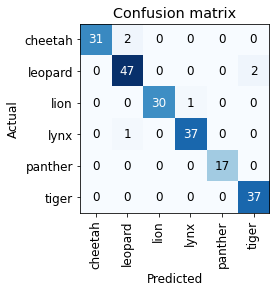

In [59]:
# we can then create a confusion matrix from the model, which tells us how accurate our model is
# with a confusion matrix you want a clear diagonal line of squares from top left to bottom right

interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

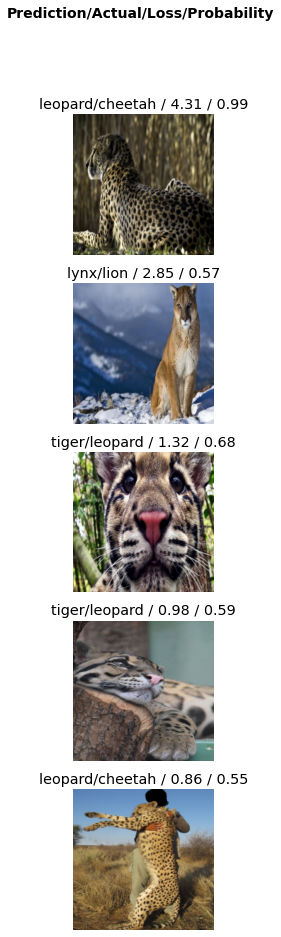

In [60]:
# we bring up the images which are producing the most loss in our model
interp.plot_top_losses(5, nrows=5)

In [61]:
# we manually clean the data, having allowed the model to process it - this allows the model to tell us what data is
# the most problematic
cleaner = ImageClassifierCleaner(learn)
cleaner

In [67]:
# move or delete problematic data
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [73]:
learn.export()

In [74]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [75]:
learn_inf = load_learner(path/'export.pkl')

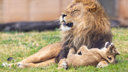

In [76]:
im2 = Image.open('test/lion.jpg')
im2.to_thumb(128, 128)

In [77]:
learn_inf.predict('test_images/lion.jpg')

FileNotFoundError: [Errno 2] No such file or directory: 'test_images/lion.jpg'

In [ ]:
# learn_inf.dls_vocab

In [ ]:
btn_upload = widgets.FileUpload()
btn_upload

In [ ]:
# we turn the uploaded file into a pillow image
img = PILImage.create(btn_upload.data[-1])

In [ ]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: 
    display(img.to_thumb(128, 128))
out_pl

In [ ]:
pred,pred_idx,probs = learn_inf.predict(img)

In [ ]:
# create a label for the uploaded image
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred.capitalize()}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

In [ ]:
# we create a button to do the classification
btn_run = widgets.Button(description='Classify')
btn_run

In [ ]:
# we need to handle click events, which will execute when the classify button is pressed
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value=f'Prediction: {pred.capitalize()}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [ ]:
btn_upload = widgets.FileUpload()

In [ ]:
VBox([widgets.Label('Select your big cat'),
     btn_upload, btn_run, out_pl, lbl_pred])

In [ ]:
#now we turn it into a real app
!pip install voila
!jupyter serverextension enable --sys-prefix voila